![polytechnic of tehran](https://www.irangi.org/uploads/images/4_1560089256_1291127534.png)
<div style="text-align:center"><span style="color:blue; font-family:Georgia; font-size:2em;">Computational Geometry course</span></div>.

<div style="text-align:center"><span style="color:blue; font-family:Georgia; font-size:2em;">Professor: Dr. Mohades (mohades@aut.ac.ir)</span></div>.     


Date: 5,Nov,2020 

student: M. Ardestani (ardestani.zr@aut.ac.ir)


## 1) Finding Star-shaped Polygon Algorithm:

In [22]:
#importing libraries 
import numpy as np
import math as mt
import random as rd
import matplotlib.pyplot as plt

In [23]:
class point:
    x=0 # x coordinate of P
    y=0 # y coordinate of P
    theta=0#counter-clockwise angle of vector with respect to Y=y_(S_0)line, between(-180,+180]
    dis=0 # P distance from S_0
    def __init__(self,a,b):
        self.x =a
        self.y =b
    
    def angleCalculator(self,a,b):
        #a,b are coordination of S_0 point 
        # now we calculate the angle between S0P and y_(S_0)
        vector1=[1,0] # base vector (a parallel vector to y_(S_0) line)
        vector2=[(self.x-a),(self.y-b)] # S_0P vector
        cosTh = np.dot(vector1,vector2)
        sinTh = np.cross(vector1,vector2)
        self.theta = np.rad2deg(np.arctan2(sinTh,cosTh))
        # you need more info? :https://stackoverflow.com/questions/53970131/how-to-find-the-clockwise-angle-between-two-vectors-in-python
    
    def disCalculator(self,a,b):
        #a,b are coordination of S_0 point
        result = mt.sqrt( ((self.x-a)**2) + ((self.y-b)**2) )
        self.dis = str(round(result, 4))
    def printPoint(self):
        print("x:",self.x,"y:",self.y,"angle:",self.theta,"dis:",self.dis)
        


Welcome! This program will find a starshaped polygon for N vertices in 2D plane.

How many number of vertices Do you want to have? Inter an integer: 
100


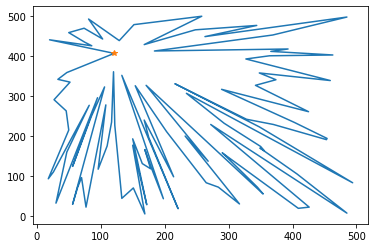

Would you like to run again? (Inter 1, OW Inter 0) 
1


How many number of vertices Do you want to have? Inter an integer: 
23


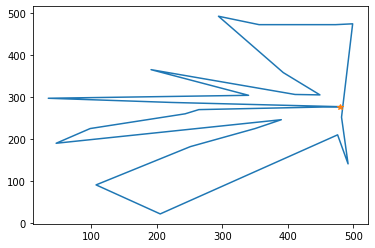

Would you like to run again? (Inter 1, OW Inter 0) 
0
 Thanks for your choice. Hope you have enjoyed!


In [24]:
## main part of program

print("Welcome! This program will find a starshaped polygon for N vertices in 2D plane.\n")
while (1):
    print("How many number of vertices Do you want to have? Inter an integer: ")
    inputFromUser = int(input())
    # Generating a list of random points and random starting point n 2D plane
    Range=[1,500] # define range of random numbers 
    S0 = []   # [x,y] Starting point that is a member of Kernel
    N = inputFromUser #total number of points 
    points = [] # List of all other points 
    chain= [] # final chain of star shaped polygon
    S0=[rd.randint(Range[0],Range[1]),rd.randint(Range[0],Range[1])]
    for i in range(0,N):
        points.append(point(rd.randint(Range[0],Range[1]),rd.randint(Range[0],Range[1])))
    for i in range(0,N):
        points[i].angleCalculator(S0[0],S0[1])
        points[i].disCalculator(S0[0],S0[1])


    # First sort by distance next sort by angle (Second sort is stable)
    points.sort(key=lambda x: x.dis, reverse=False)
    points.sort(key=lambda x: x.theta, reverse=False)

    # Finding the fist and the last negative and positive angles 
    mostNegative=-1 # most Negatie angle index
    leastNegative=-1 # least negative angle index 
    leastPositive=-1
    mostPositive=-1
    for i in range(0,N):
        if(points[i].theta>=0):
            if(i!=0):
                mostNegative=0
                leastNegative=i-1
            leastPositive=i
            mostPositive=N-1
            break
        if(i==(N-1)): # it means we have not found any positive angle so far
            mostNegative=0
            leastNegative=N-1

    # Finding Right side merging angle 
    if(leastNegative!=-1 and leastPositive!=-1):
        vector2=[points[leastNegative].x - S0[0],points[leastNegative].y - S0[1]]
        vector1=[points[leastPositive].x - S0[0],points[leastPositive].y - S0[1]]    
        cosTh = np.dot(vector1,vector2)
        sinTh = np.cross(vector1,vector2)
        mAngle = np.rad2deg(np.arctan2(sinTh,cosTh))# merge angle

        mAngle = abs(points[leastNegative].theta) + abs(points[leastPositive].theta)
    # creating chain of polygon (in other word, merging two star shaped polygon)
    if(leastNegative==-1 or leastPositive==-1 or mAngle<=180):
        chain.append(S0)
        for i in range(0,N):
            chain.append([points[i].x,points[i].y])
        chain.append(S0)
    else:
        # we create this chain:
        # mostNegative ... leastNegative S0 leastPosive ... mostPositive mostnegative
        chain.append([points[mostNegative].x,points[mostNegative].y])
        if(mostNegative!=leastNegative):
            for i in range( (mostNegative+1), (leastNegative+1)):
                chain.append([points[i].x,points[i].y])
        chain.append(S0)
        chain.append([points[leastPositive].x,points[leastPositive].y])
        if(leastPositive!=mostPositive):
            for i in range( (leastPositive+1), (mostPositive+1)):
                chain.append([points[i].x,points[i].y])
        chain.append([points[mostNegative].x,points[mostNegative].y])
        
    xs, ys = zip(*chain) #returning 2 lists of x and y values
    plt.figure()
    plt.plot(xs,ys) 
    plt.plot(S0[0], S0[1],marker='*')
    plt.show()
    print("Would you like to run again? (Inter 1, OW Inter 0) ")
    runAgain = int(input())
    if(runAgain != 1):
        print(" Thanks for your choice. Hope you have enjoyed!")
        break
    print("\n")
    
    

.



## Thanks for your attention
### If you need any more information, please contact me.